In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from random import seed
random_state = 42
seed(random_state)

In [2]:
y_col = 'is_scam'

In [3]:
df = pd.read_csv('labeled_dataset.csv').set_index('wallet')
df.shape

(3196, 34)

In [4]:
df = df.sample(frac=1.0, random_state=random_state)

In [5]:
train, test = train_test_split(df, random_state=42)

In [6]:
model = RandomForestClassifier()

In [7]:
train_x = train.drop(y_col, axis=1)
train_y = train[y_col]

test_x = test.drop(y_col, axis=1)
test_y = test[y_col]

In [8]:
model.fit(train_x, train_y)

/Users/asvanevik/.local/share/virtualenvs/asvanevik-otMeAH4x/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
train_preds = model.predict(train_x)
test_preds = model.predict(test_x)
train_preds_proba = model.predict_proba(train_x)
test_preds_proba = model.predict_proba(test_x)

In [10]:
print("TRAINING SET")
print(classification_report(train_y, train_preds))

TRAINING SET
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1189
         1.0       1.00      0.99      0.99      1208

   micro avg       0.99      0.99      0.99      2397
   macro avg       0.99      0.99      0.99      2397
weighted avg       0.99      0.99      0.99      2397



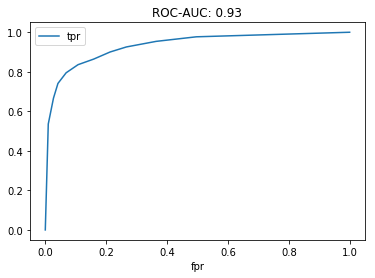

In [14]:
test_roc_auc_score = roc_auc_score(test_y, test_preds_proba[:,1])
fpr, tpr, thresholds = roc_curve(test_y, test_preds_proba[:,1])
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds})
roc_df.plot(x='fpr', y='tpr', title="ROC-AUC: {:.2f}".format(test_roc_auc_score));

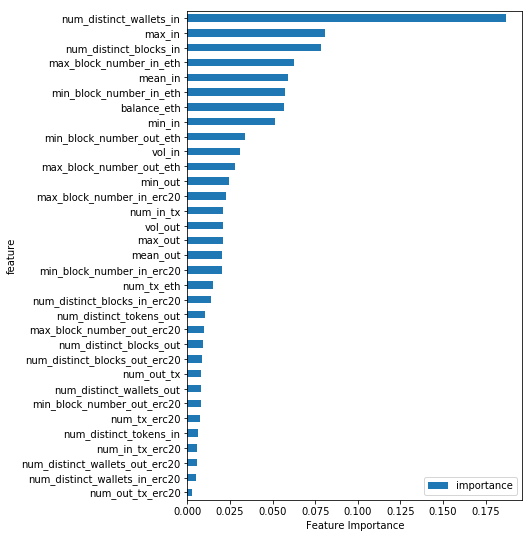

In [36]:
fi = pd.DataFrame(list(zip(train_x.columns, model.feature_importances_)))
fi.columns = ['feature', 'importance']
fi.set_index('feature', inplace=True)
ax = fi.sort_values('importance').plot(kind='barh', figsize=(6, 9));
ax.set_xlabel('Feature Importance');

In [12]:
print("TEST SET")
print(classification_report(test_y, test_preds))

TEST SET
              precision    recall  f1-score   support

         0.0       0.85      0.89      0.87       409
         1.0       0.88      0.84      0.86       390

   micro avg       0.86      0.86      0.86       799
   macro avg       0.87      0.86      0.86       799
weighted avg       0.87      0.86      0.86       799



In [13]:
test_preds_proba

array([[1. , 0. ],
       [0. , 1. ],
       [0.5, 0.5],
       ...,
       [1. , 0. ],
       [0.8, 0.2],
       [1. , 0. ]])

In [37]:
full_df = pd.read_csv('all_wallets.csv').set_index('wallet')
full_df.shape

(56411307, 33)

In [38]:
full_preds_proba = model.predict_proba(full_df)

In [39]:
full_df['is_scam'] = full_preds_proba[:,1]

In [40]:
highest_scores = list(full_df[full_df['is_scam'] > 0.95].index)
for entry in highest_scores:
    full_df.loc[entry, 'is_scam'] = 0.95

In [41]:
real_scams = list(df[df['is_scam'] == 1].index)
for scam in real_scams:
    full_df.loc[scam, 'is_scam'] = 1.0

In [42]:
full_df['is_scam'].value_counts()

0.00    29235042
0.10     6843841
0.20     4581451
0.30     3716068
0.40     3276629
0.50     2661780
0.60     1948772
0.70     1539654
0.80     1153232
0.90      873810
0.95      579430
1.00        1598
Name: is_scam, dtype: int64

In [ ]:
full_df.to_csv('all_wallets_with_scores.csv')